<a href="https://colab.research.google.com/github/Raju-24-25/Model-Building-Handsons/blob/main/Implement_a_machine_learning_linear_regression_model_to_estimate_house_prices_from_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction using Linear Regression

## 📌 Objective
To build a regression model that predicts house prices based on property features using Linear Regression, while following a clean and professional machine learning workflow.

## 📊 Dataset
King County Housing Dataset  
(Used for predicting house prices based on size, location, and quality features)

## 🛠 Tools & Libraries
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn


# 1️. Import Libraries

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2️. Load Dataset

In [2]:
housing_data = pd.read_csv('/content/housing.csv')

Preview the data

In [3]:
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3️. Data Understanding & Structure

In [4]:
housing_data.shape

(21613, 21)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data Insights -
- The dataset contains numerical features related to house size, quality, and location.
- The target variable is `price`.
- No major missing values were observed.


# 4️. Data Cleaning

Remove non-informative features

In [6]:
housing_data.drop('date', axis = 1, inplace=True)

In [7]:
housing_data.isnull().sum()

,0
id,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [8]:
housing_data.duplicated().sum()

np.int64(3)


- The `date` column was removed as it does not directly contribute to price prediction.
- No missing or duplicate values were found.


# 5️. Correlation Heatmap

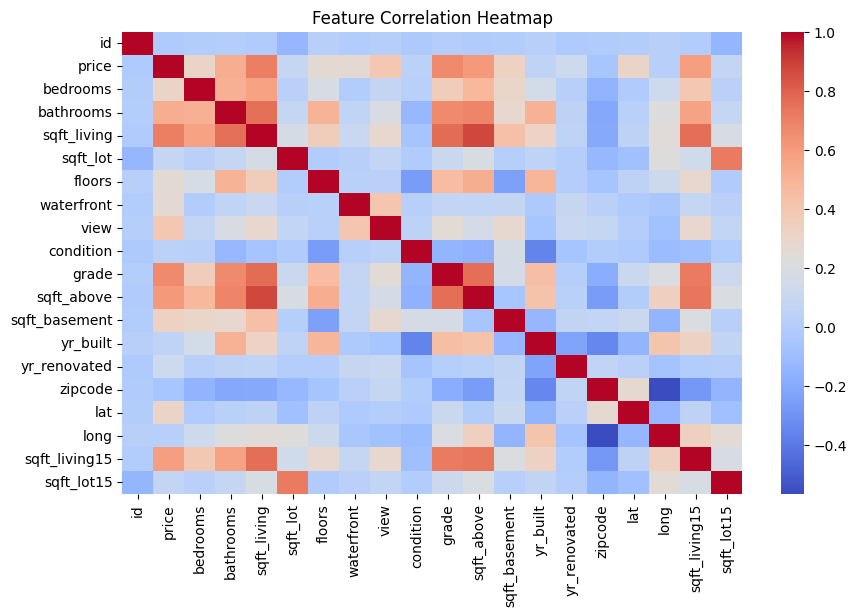

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(housing_data.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
# col = housing_data.columns

In [11]:
# for i in col:
  # if housing_data[i].dtypes != "object":
    # sns.boxplot(housing_data[i])
    # plt.xlabel(i)
    # plt.show()

In [12]:
# out_col = ['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','long','sqft_living15']

In [13]:
# def outlier_remover (df):
  # for i in out_col:

    # Q1 = df[i].quantile(0.25)
    # Q3 = df[i].quantile(0.75)

    # IQR = Q3-Q1

    # lower_limit = Q1-(1.5*IQR)
    # upper_limit = Q3+(1.5*IQR)
    # df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

In [14]:
# outlier_remover(housing_data)

In [15]:
# for i in col:
  # if housing_data[i].dtypes != "object":
    # sns.boxplot(housing_data[i])
    # plt.xlabel(i)
    # plt.show()

# 6️. Feature & Target Separation

In [16]:
x = housing_data.drop('price',axis=1)
y = housing_data['price']

- `X` contains all independent features.
- `y` is the target variable (house price).


# 7️. Importing Train–Test Split &  Model Training Libraries

- Linear Regression is used as a baseline model to understand the relationship between features and price.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

# 8. Prediction & Comparison

In [21]:
predicted_values = model.predict(x_test)

In [22]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : predicted_values})
result

,Actual,Predicted
735,365000,4.630006e+05
2830,865000,7.451182e+05
4106,1038000,1.235194e+06
16218,1490000,1.654699e+06
19964,711000,7.282665e+05
...,...,...
11144,650000,8.593758e+05
17803,705000,6.058149e+05
268,272500,4.463235e+05
518,2250000,1.329623e+06


# 9. Model Evaluation

In [23]:
print("R² Score:", r2_score(y_test, predicted_values))
print("MAE:", mean_absolute_error(y_test, predicted_values))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predicted_values)))

R² Score: 0.7048688933883289
MAE: 126536.33518877509
RMSE: 210114.16201584492


- Multiple evaluation metrics are used to better understand model performance.


# 1️0. Model Visualization

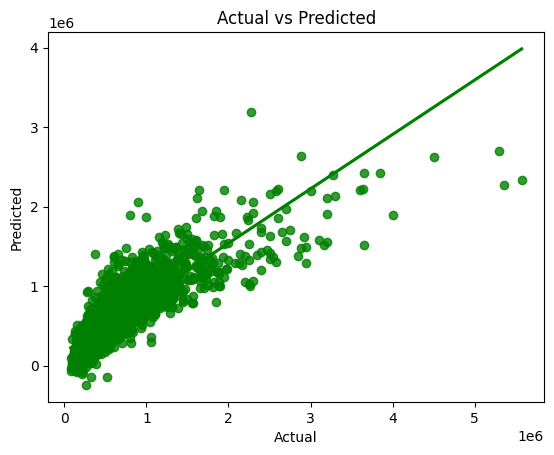

In [24]:
sns.regplot(x=y_test,y=predicted_values,ci=None,color ='green');
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

<Axes: ylabel='price'>

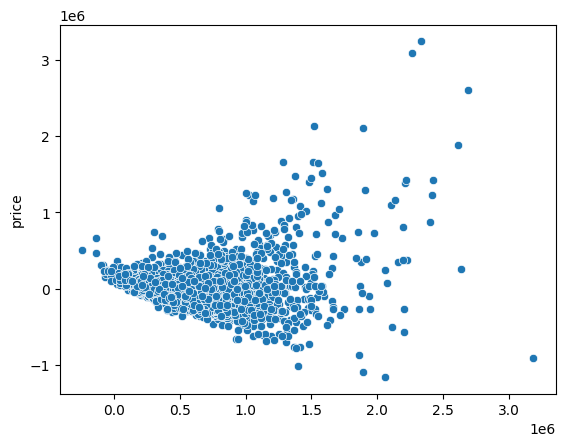

In [25]:
sns.scatterplot(x=predicted_values, y=y_test - predicted_values)

##  Insights
- Linear Regression was able to capture the overall trend of house prices.
- The model performs reasonably well as a baseline.
- Extreme values were retained since they represent valid high-end properties.
- Further improvement can be achieved using feature engineering and regularized models.


# 1️1. Conclusion

This project demonstrates a complete machine learning workflow:
- Data cleaning and preparation
- Exploratory analysis
- Model training and evaluation

The notebook is structured for clarity, reproducibility, and future enhancement using advanced regression techniques.
